In [43]:
import os
from OCC.Extend.DataExchange import read_step_file, write_step_file
from OCC.Core.TopoDS import TopoDS_Compound, TopoDS_Shape, TopoDS_Iterator
from OCC.Core.TopAbs import TopAbs_COMPOUND, TopAbs_SOLID, TopAbs_FACE, TopAbs_EDGE, TopAbs_VERTEX

# Функция для сохранения подформы в файл
def save_sub_shape(sub_shape, index):
    # Создаем имя файла для подформы
    filename = f"sub_shape_{index}.step"
    write_step_file(sub_shape, filename)
    print(f"Подформа сохранена в файл: {filename}")

# Чтение STEP-файла
step_file = "C:/Users/Alex/3D Objects/Simulated_data_step/00000001.step"
shape = read_step_file(step_file)

# Проверка на тип объекта
if isinstance(shape, TopoDS_Compound):
    print("Объект является составным (Compound).")

    # Создаем итератор для обхода подформ
    it = TopoDS_Iterator(shape)

    index = 1  # Индекс для имен файлов
    while it.More():
        sub_shape = it.Value()
        
        # Сохраняем подформу в файл
        save_sub_shape(sub_shape, index)
        
        index += 1  # Увеличиваем индекс
        it.Next()
else:
    print("Объект не является составным.")

Number of shapes: 2
Объект является составным (Compound).
Подформа сохранена в файл: sub_shape_1.step
Подформа сохранена в файл: sub_shape_2.step


In [54]:
import sys
from stl import mesh
import numpy as np

def stl_to_xyz(stl_file, xyz_file):
    # Read the STL file
    your_mesh = mesh.Mesh.from_file(stl_file)

    # Extract vertices
    vertices = your_mesh.points.reshape(-1, 3)

    # Write vertices to XYZ file
    with open(xyz_file, 'w') as f:
        for vertex in vertices:
            f.write(f"{vertex[0]} {vertex[1]} {vertex[2]}\n")

    print(f"Successfully written {xyz_file}")

stl_to_xyz("mesh.stl", "mesh.xyz")


Successfully written mesh.xyz


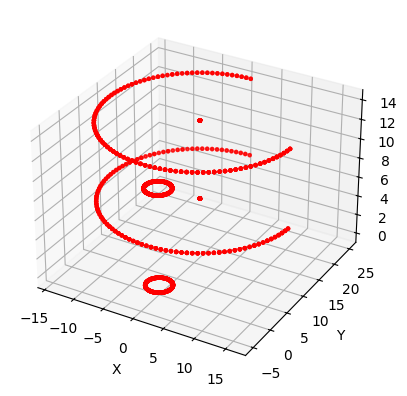

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_xyz(xyz_file):
    # Read the XYZ file
    vertices = np.loadtxt(xyz_file)
    return vertices

def visualize_xyz(xyz_file, point_size=10):  # Add a point_size parameter
    # Read vertices from the XYZ file
    vertices = read_xyz(xyz_file)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract coordinates
    x = vertices[:, 0]
    y = vertices[:, 1]
    z = vertices[:, 2]

    # Plot the vertices with a smaller point size
    ax.scatter(x, y, z, c='r', marker='o', s=point_size)  # Use the point_size parameter

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()

# Example usage: visualize_xyz("mesh.xyz", point_size=5)  # Adjust the point size as needed
visualize_xyz("mesh.xyz", point_size=5)  # You can adjust the size here


In [56]:
import sys
import numpy as np
from stl import mesh

def read_xyz(xyz_file):
    # Read the XYZ file
    vertices = np.loadtxt(xyz_file)
    return vertices

def create_stl_from_xyz(xyz_file, stl_file):
    # Read vertices from the XYZ file
    vertices = read_xyz(xyz_file)

    # Create a list to store the faces (triangles)
    faces = []

    # Assuming the vertices form a simple triangular mesh
    # For simplicity, let's create triangles using consecutive vertices
    num_vertices = len(vertices)
    for i in range(0, num_vertices - 2, 3):
        face = [
            vertices[i],
            vertices[i + 1],
            vertices[i + 2]
        ]
        faces.append(face)

    # Create the mesh
    stl_mesh = mesh.Mesh(np.zeros(len(faces), dtype=mesh.Mesh.dtype))
    for i, face in enumerate(faces):
        stl_mesh.vectors[i] = np.array([
            face[0],
            face[1],
            face[2]
        ])

    # Write the STL file
    stl_mesh.save(stl_file)
    print(f"Successfully written {stl_file}")

create_stl_from_xyz("mesh.xyz", "mesh_compl.stl")

Successfully written mesh_compl.stl


In [59]:
pip install pythonocc-core==0.16

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pythonocc-core==0.16 (from versions: none)
ERROR: No matching distribution found for pythonocc-core==0.16
You should consider upgrading via the 'c:\users\alex\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
